# **Importing Necessary Libraries**

---



In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Dataset**

---



In [129]:
df = pd.read_csv("har_train.csv")

In [130]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1


In [131]:
bp_upper = list()
bp_lower = list()

for i in df["Blood Pressure"]:

  split = i.split("/")
  bp_upper.append(int(split[0]))
  bp_lower.append(int(split[1]))


In [132]:
df["BP Upper"] = bp_upper
df["BP Lower"] = bp_lower

In [133]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,BP Upper,BP Lower
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1,129,90
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1,159,105
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0,161,109
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1,120,62
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1,153,110


In [134]:
df = df.drop("Blood Pressure", axis=1)

In [135]:
df.shape

(7010, 27)

In [136]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP Upper,BP Lower
count,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,...,7010.000000,7010.000000,7010.00000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000
mean,53.510414,259.880742,75.105991,0.652782,0.491869,0.896291,0.499857,0.595863,9.979109,0.498146,...,5.451783,5.994007,158245.34893,28.878692,416.782026,3.491583,7.024822,0.357204,135.015549,85.150214
std,21.290957,80.709248,20.507160,0.476120,0.499970,0.304904,0.500036,0.490759,5.769721,0.500032,...,2.857989,3.472022,80585.31666,6.322401,224.195136,2.281077,1.990908,0.479210,26.230182,14.739391
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,...,1.000000,0.001263,20062.00000,18.002337,30.000000,0.000000,4.000000,0.000000,90.000000,60.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.046024,0.000000,...,3.000000,2.971831,88368.00000,23.422280,221.000000,2.000000,5.000000,0.000000,112.000000,72.000000
50%,53.000000,259.000000,75.000000,1.000000,0.000000,1.000000,0.000000,1.000000,9.982968,0.000000,...,5.000000,5.936919,157378.50000,28.737627,416.000000,3.000000,7.000000,0.000000,135.000000,85.000000
75%,72.000000,329.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.029659,1.000000,...,8.000000,9.017592,227218.50000,34.321158,613.000000,5.000000,9.000000,1.000000,158.000000,98.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,...,10.000000,11.999313,299954.00000,39.993581,800.000000,7.000000,10.000000,1.000000,180.000000,110.000000


# **Checking for NULL Values**

---



In [137]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
BP Upper                           0
BP Lower                           0
d

# **Data Visualisation**

---



<Axes: xlabel='BP Upper', ylabel='BP Lower'>

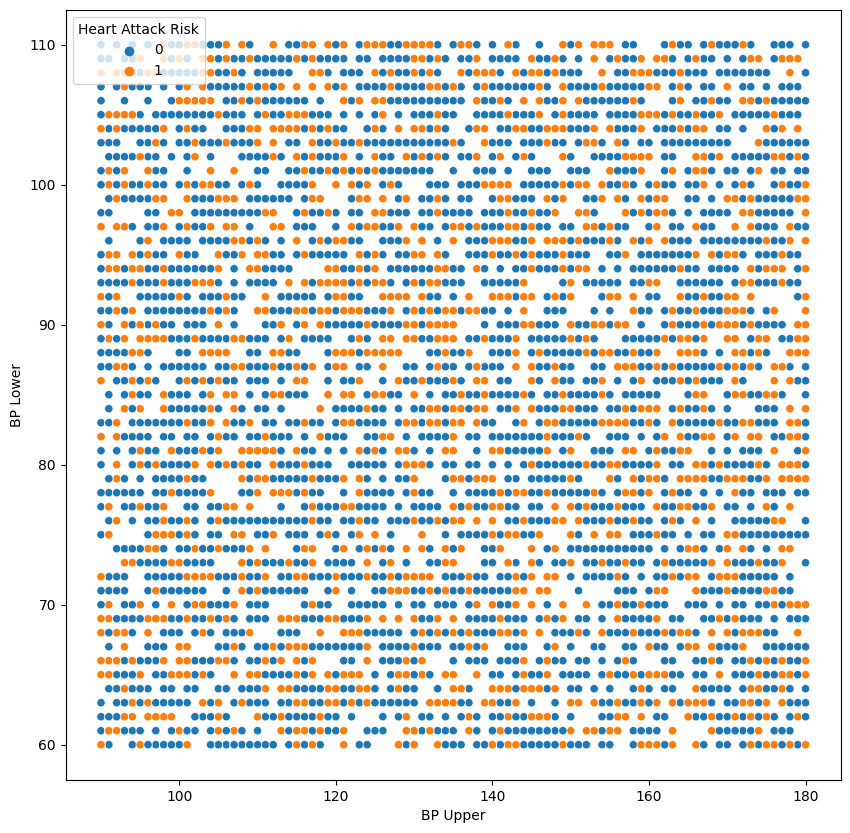

In [138]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="BP Upper", y="BP Lower", data=df, hue="Heart Attack Risk")

<Axes: xlabel='Age', ylabel='Heart Rate'>

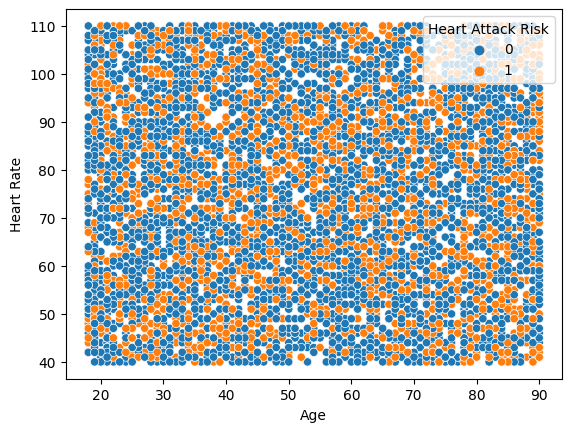

In [102]:
sns.scatterplot(x="Age", y="Heart Rate", data=df, hue="Heart Attack Risk")

<Axes: xlabel='Sex', ylabel='count'>

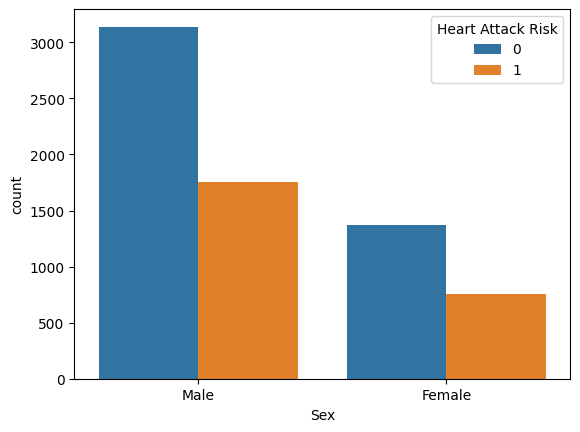

In [75]:
sns.countplot(x="Sex", data=df, hue="Heart Attack Risk")

<Axes: xlabel='Country', ylabel='count'>

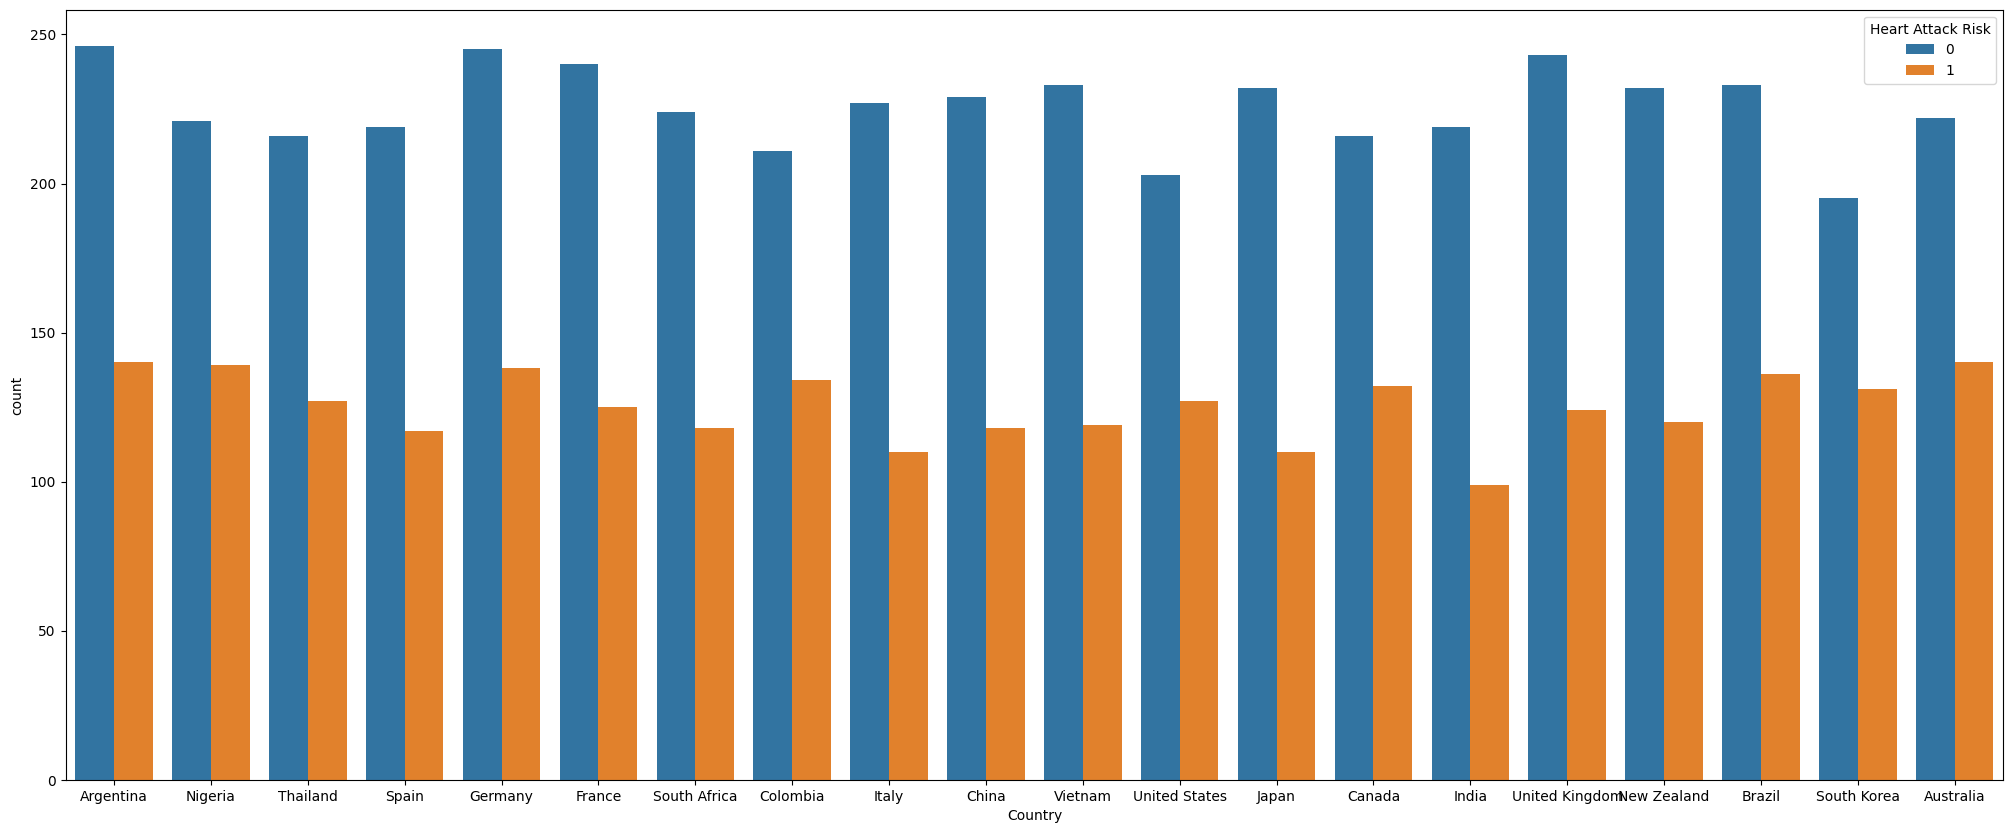

In [76]:
plt.figure(figsize=(25,10))
sns.countplot(x="Country", data=df, hue="Heart Attack Risk")

<Axes: xlabel='Hemisphere', ylabel='count'>

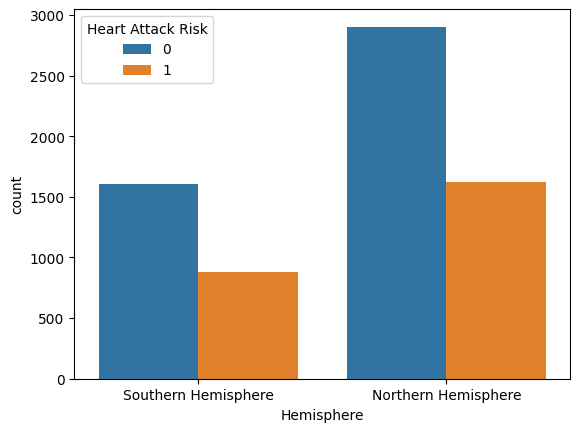

In [77]:
sns.countplot(x="Hemisphere", data=df, hue="Heart Attack Risk")

<Axes: >

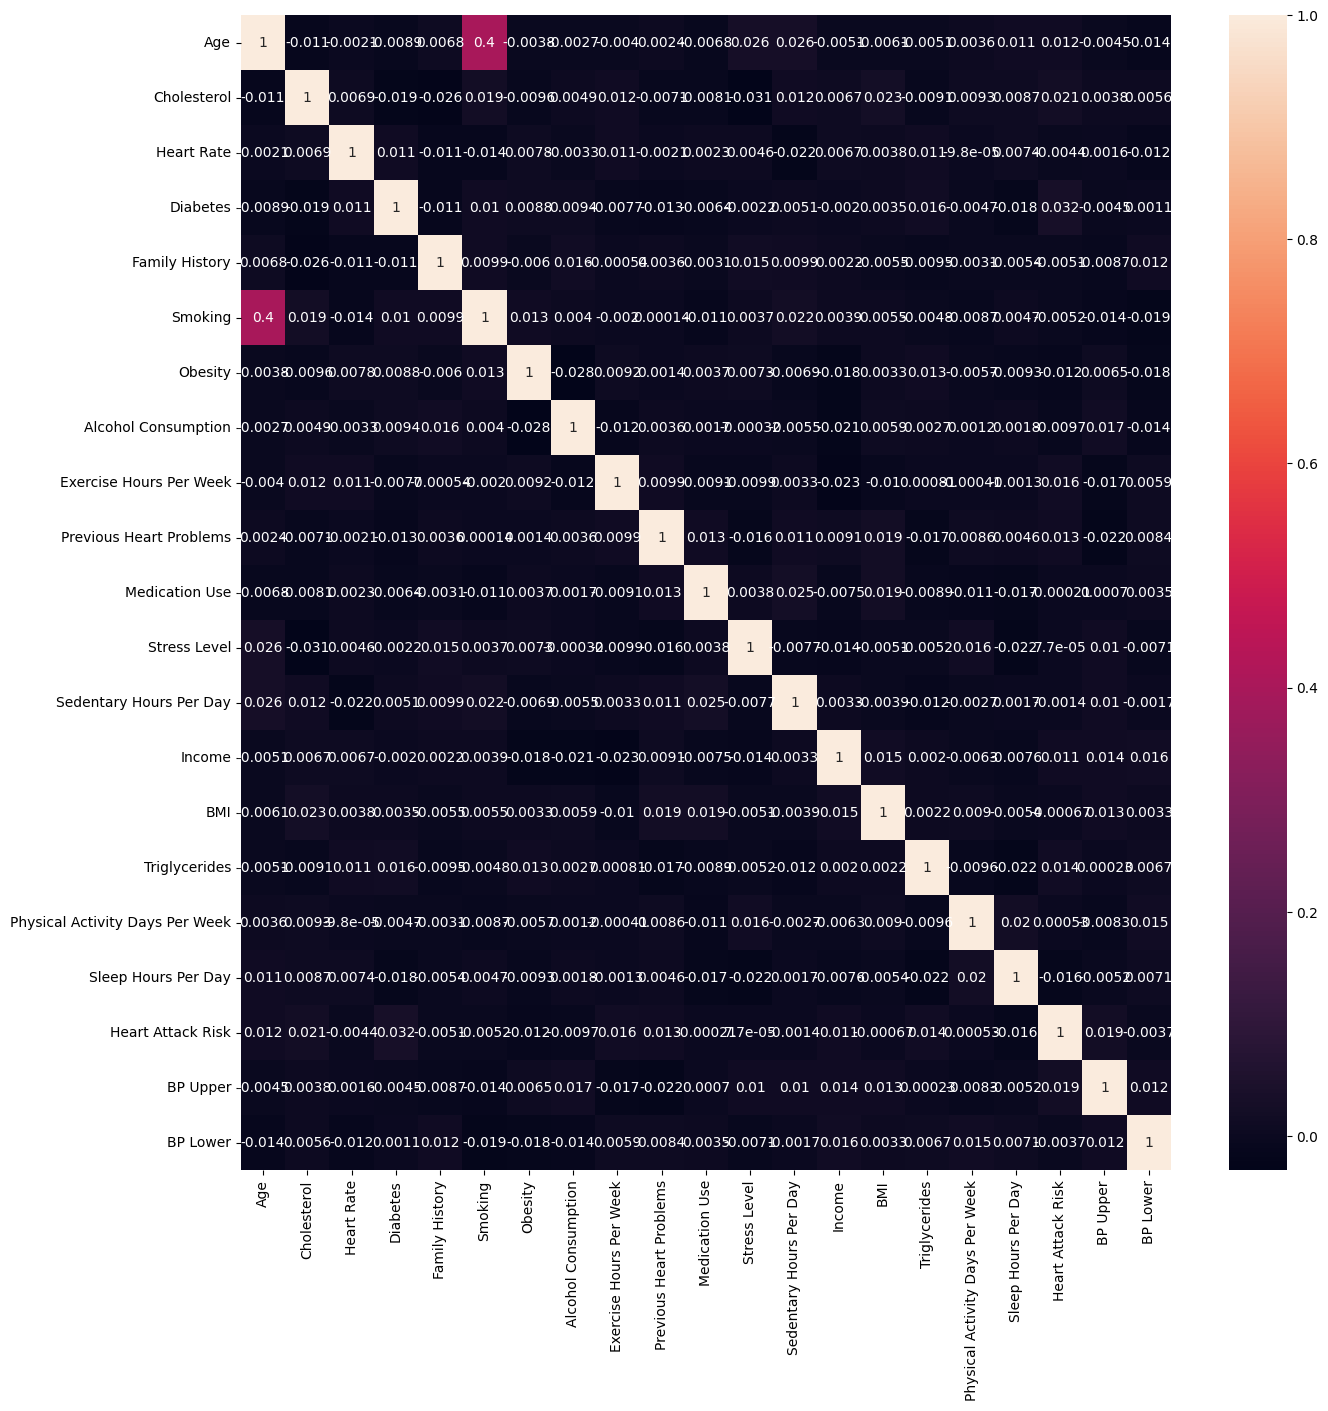

In [139]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

# **Seperating Dependent & Independent Variables**

---



In [140]:
X = df.drop(["Patient ID", "Heart Attack Risk"], axis=1)
y = df["Heart Attack Risk"]

In [141]:
X.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,BP Upper,BP Lower
0,33,Male,200,48,0,1,1,1,1,7.807690,...,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,129,90
1,56,Female,262,46,1,0,1,0,0,17.297628,...,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,159,105
2,19,Female,140,54,0,1,0,0,1,8.695288,...,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,161,109
3,50,Female,163,53,0,1,1,1,1,10.161587,...,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,120,62
4,89,Female,144,92,1,0,1,0,1,16.436787,...,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,153,110


In [142]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Heart Attack Risk, dtype: int64

# **Encoding**

---



In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
cat_cols = dict()

for i in range(len(X.columns)):

  if(X.dtypes[i] == object):

    col = X.columns[i]
    print(col)

    cat_cols[col] = LabelEncoder()

    X[col] = cat_cols[col].fit_transform(X[col])

Sex
Diet
Country
Continent
Hemisphere


In [146]:
X.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,BP Upper,BP Lower
0,33,1,200,48,0,1,1,1,1,7.807690,...,184066,30.449815,63,6,7,0,5,1,129,90
1,56,0,262,46,1,0,1,0,0,17.297628,...,211755,34.973685,333,7,8,12,0,0,159,105
2,19,0,140,54,0,1,0,0,1,8.695288,...,252203,30.554246,537,2,10,16,1,0,161,109
3,50,0,163,53,0,1,1,1,1,10.161587,...,121954,35.390265,591,0,9,15,3,1,120,62
4,89,0,144,92,1,0,1,0,1,16.436787,...,180121,39.575483,145,2,5,7,3,0,153,110


# **Splitting into Training & Testing Set**

---



In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [149]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5608, 25)
(1402, 25)
(5608,)
(1402,)


# **Model Building - XGB Classifier**

---



In [45]:
from xgboost import XGBClassifier
xgbc_model = XGBClassifier()

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
xgbc_params = {'gamma' :[i/10.0 for i in range(0,5)],
               'max_depth' : [2,4,6,8,10,12,13,15],
               'min_child_weight':[1,2,5,10],
               'max_delta_step':[0,1,2,5,10],
               'subsample' :[i/10.0 for i in range(5,10)],
               'colsample_bytree' :[i/10.0 for i in range(5,10)],
               'colsample_bylevel' :[i/10.0 for i in range(5,10)],
               'n_estimators' : [100,150,200,300]
               }

In [150]:
xgbc_cv = RandomizedSearchCV(estimator=xgbc_model,
                            param_distributions=xgbc_params,
                            cv=10)

In [151]:
xgbc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=0.7,
                                           colsample_bynode=None,
                                           colsample_bytree=0.8, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0.3, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=N...
                                           n_estimators=150, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bylevel': [0.5, 0.6, 0.7,
                                                              0.8, 0.9],
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'max_delta_step': [0, 1, 2, 5, 10],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 13,
                                                      15],
                                        'min_child_weight': [1, 2, 5, 10],
                                        'n_estimators': [100, 150, 200, 300],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]})

In [152]:
xgbc_cv.best_params_

{'subsample': 0.8,
 'n_estimators': 300,
 'min_child_weight': 10,
 'max_depth': 13,
 'max_delta_step': 10,
 'gamma': 0.4,
 'colsample_bytree': 0.9,
 'colsample_bylevel': 0.5}

In [153]:
xgbc_model = XGBClassifier( subsample = 0.8,
                           n_estimators = 3000,
                            min_child_weight = 10,
                            max_depth = 13,
                            max_delta_step = 10,
                            gamma = 0.4,
                            colsample_bytree = 0.9,
                            colsample_bylevel = 0.5
                            )

In [154]:
xgbc_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=10,
              max_depth=13, max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=3000,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [155]:
xgbc_model.score(X_test, y_test)

0.5741797432239658

# **Model Building - Random Forest Classification**

---



In [175]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [176]:
from sklearn.model_selection import RandomizedSearchCV

In [177]:
rfc_params = {'max_depth': list(range(10, 15)),
               'max_features': list(range(2,14))}

In [178]:
rfc_cv = RandomizedSearchCV(estimator=rfc_model,
                            param_distributions=rfc_params,
                            cv=10)

In [179]:
rfc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 11, 12, 13, 14],
                                        'max_features': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13]})

In [180]:
rfc_cv.best_params_

{'max_features': 2, 'max_depth': 11}

In [181]:
rfc_model = RandomForestClassifier(
    max_features=2, max_depth=11
)

In [182]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, max_features=2)

In [183]:
rfc_model.score(X_test, y_test)

0.6412268188302425

# **Testing Data**

---



In [156]:
test_df = pd.read_csv("har_test.csv")

In [157]:
test_df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere
1,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,4,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere
2,RQX1211,60,Male,145,160/98,71,1,0,1,0,...,8,5.994228,234966,29.162319,247,7,7,Canada,North America,Northern Hemisphere
3,RVN4963,45,Male,294,130/84,66,0,0,1,1,...,9,7.007392,216565,25.120605,360,4,6,France,Europe,Northern Hemisphere
4,NCU1956,36,Male,133,161/90,97,1,0,1,1,...,10,10.963544,223132,22.386804,605,5,10,Canada,North America,Northern Hemisphere


In [158]:
test_df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
dtype: int64

In [160]:
test_bp_upper = list()
test_bp_lower = list()

for i in test_df["Blood Pressure"]:

  split = i.split("/")

  test_bp_upper.append(int(split[0]))
  test_bp_lower.append(int(split[1]))

In [161]:
test_df["BP Upper"] = test_bp_upper
test_df["BP Lower"] = test_bp_lower

In [162]:
test_df = test_df.drop("Blood Pressure", axis=1)

In [163]:
for i in cat_cols:

  print(cat_cols[i].classes_)

['Female' 'Male']
['Average' 'Healthy' 'Unhealthy']
['Argentina' 'Australia' 'Brazil' 'Canada' 'China' 'Colombia' 'France'
 'Germany' 'India' 'Italy' 'Japan' 'New Zealand' 'Nigeria' 'South Africa'
 'South Korea' 'Spain' 'Thailand' 'United Kingdom' 'United States'
 'Vietnam']
['Africa' 'Asia' 'Australia' 'Europe' 'North America' 'South America']
['Northern Hemisphere' 'Southern Hemisphere']


In [164]:
X_subs = test_df.drop("Patient ID", axis=1)

In [165]:
for i in cat_cols:

  X_subs[i] = cat_cols[i].transform(X_subs[i])

In [166]:
X_subs.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,BP Upper,BP Lower
0,67,1,208,72,0,0,1,0,0,4.168189,...,261404,31.251233,286,0,6,0,5,1,158,88
1,84,1,220,107,0,0,1,1,1,3.427929,...,122093,22.221862,370,6,7,10,1,0,131,68
2,60,1,145,71,1,0,1,0,1,1.892559,...,234966,29.162319,247,7,7,3,4,0,160,98
3,45,1,294,66,0,0,1,1,1,13.693785,...,216565,25.120605,360,4,6,6,3,0,130,84
4,36,1,133,97,1,0,1,1,1,3.618009,...,223132,22.386804,605,5,10,3,4,0,161,90


# **Submission File - 1**

---



In [167]:
y_subs1 = xgbc_model.predict(X_subs)

In [172]:
subs1_df = pd.DataFrame({
    "Patient ID": test_df["Patient ID"],
    "Heart Attack Risk": y_subs1
})

In [173]:
subs1_df.head()

,Patient ID,Heart Attack Risk
0,BMW7812,1
1,XXM0972,0
2,RQX1211,0
3,RVN4963,0
4,NCU1956,1


In [174]:
subs1_df.to_csv("submission1.csv", index=False)

# **Submission File - 2**

---



In [184]:
y_subs2 = rfc_model.predict(X_subs)

In [185]:
subs2_df = pd.DataFrame({
    "Patient ID": test_df["Patient ID"],
    "Heart Attack Risk": y_subs2
})

In [186]:
subs2_df.head()

,Patient ID,Heart Attack Risk
0,BMW7812,0
1,XXM0972,0
2,RQX1211,0
3,RVN4963,0
4,NCU1956,0


In [187]:
subs2_df.to_csv("submission2.csv", index=False)